In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,datetime,timedelta
from constants import KAWASANKU_CENSUS_DISTRICT
from helper import telegram_image

from constants_secret import TOKEN_CHANNEL_AKSARA

from helper import download_csv, telegram_msg


https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/census/census_district.csv


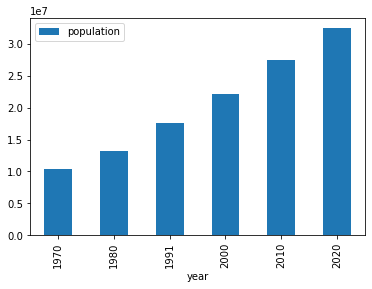

In [9]:
import pandas as pd


# take data
df = pd.read_csv('data/census_district.csv', usecols=['state','year','population_total'])
 

df = df.groupby('year').sum().reset_index()
df.columns = ['year','population']
df.population = df.population.astype(int)

fig, ax = plt.subplots()
df.plot(x ='year', y=['population'], kind="bar", ax=ax)
plt.savefig('charts/census_trend.png')

# send chart
telegram_image(src='charts/census_trend.png',
               caption='Census District',
               conf=TOKEN_CHANNEL_AKSARA)

TypeError: object of type 'numpy.float32' has no len()

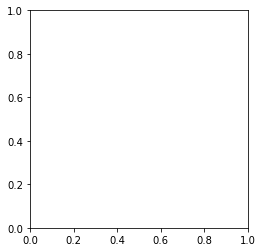

In [5]:
df = pd.read_csv('data/census_district.csv', usecols=['state','year','population_total'])
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df.groupby('state').count()
sizes = df['population_total'].sum()
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

df = df.groupby('year').sum().reset_index()
df.columns = ['year','population']
df.population = df.population.astype(int)

fig, ax = plt.subplots()
df.plot(x ='year', y=['population'], kind="bar", ax=ax)
plt.show()